In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# .pivot_table()

Syntax: pivot_table(values='column_to_aggregate', index='row_index', columns='column_index', aggfunc='mean')

### Count of Job Titles

In [4]:
df.pivot_table(index='job_title_short', aggfunc='size')
#size vs count:
#size - counts all rows in a group (Value/Column not required)
#count - counts non-NA values in each group (Values/Column required)

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [5]:
df.groupby('job_title_short').size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

### Median Salary By Job

In [7]:
df.pivot_table(values='salary_year_avg', index='job_title_short', aggfunc='median')

,salary_year_avg
job_title_short,
Business Analyst,85000.0
Cloud Engineer,90000.0
Data Analyst,90000.0
Data Engineer,125000.0
Data Scientist,127500.0
Machine Learning Engineer,106415.0
Senior Data Analyst,111175.0
Senior Data Engineer,147500.0
Senior Data Scientist,155500.0


In [8]:
df.groupby('job_title_short')['salary_year_avg'].median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

### Median Salary Analysis by Country

In [9]:
df.pivot_table(values='salary_year_avg', index='job_title_short', columns='job_country' , aggfunc='median')
#index is what we groupby on the index column so by rows
#column is what we groupby on the column column

job_country,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bangladesh,Belarus,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Zambia,Zimbabwe
job_title_short,,,,,,,,,,,,,,,,,,,,,
Business Analyst,NaN,NaN,71100.00,NaN,70000.0,NaN,NaN,NaN,16500.0,NaN,...,NaN,72900.0,NaN,56700.0,90000.0,NaN,NaN,79200.0,NaN,NaN
Cloud Engineer,NaN,NaN,197500.00,NaN,110000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,89100.0,NaN,NaN,116100.0,NaN,NaN,NaN,NaN,NaN
Data Analyst,49950.00,44100.0,92771.75,100500.0,109500.0,80850.00,NaN,NaN,NaN,400000.0,...,69300.0,72900.0,98500.0,87750.0,90000.0,100500.0,NaN,75550.0,NaN,63000.0
Data Engineer,NaN,45000.0,96773.00,48750.0,106712.5,147500.00,NaN,211000.0,97444.0,NaN,...,NaN,89100.0,97528.0,110000.0,125000.0,NaN,NaN,96773.0,NaN,NaN
Data Scientist,69981.25,NaN,71000.00,NaN,139216.0,71249.75,NaN,NaN,NaN,NaN,...,84200.0,131846.5,166419.5,105300.0,130000.0,NaN,30750.0,70000.0,90670.0,69085.0
Machine Learning Engineer,NaN,NaN,101029.00,87021.0,101029.0,89100.00,NaN,228750.0,69000.0,NaN,...,NaN,89100.0,62850.0,149653.0,150000.0,50000.0,NaN,57600.0,NaN,NaN
Senior Data Analyst,NaN,NaN,NaN,NaN,50640.0,89100.00,NaN,NaN,NaN,NaN,...,NaN,NaN,105837.5,111175.0,110000.0,NaN,NaN,105837.5,NaN,NaN
Senior Data Engineer,NaN,NaN,147500.00,NaN,147500.0,147500.00,NaN,173500.0,NaN,NaN,...,NaN,96773.0,NaN,147500.0,150000.0,NaN,NaN,147500.0,NaN,NaN
Senior Data Scientist,157500.00,NaN,NaN,NaN,157500.0,80850.00,NaN,NaN,NaN,NaN,...,NaN,157500.0,72000.0,157500.0,155000.0,57500.0,NaN,79200.0,NaN,NaN


In [12]:
df.pivot_table(values='salary_year_avg', index='job_country', columns='job_title_short' , aggfunc='median')
#switched 'job_country' to index and 'job_title_short' to columns so that columns are shorter than rows
#want more rows than columns

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


### Median Salary By Country and Job Title Graph

In [15]:
top_countries = df['job_country'].value_counts().head(6)
top_countries

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
Spain              25100
Name: count, dtype: int64

In [14]:
#want the index
top_countries = df['job_country'].value_counts().head(6).index
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')

In [17]:
top_countries = df['job_country'].value_counts().head(6).index

df_job_country_salary = df.pivot_table(
    values='salary_year_avg',        # The data to aggregate
    index='job_country',             # Rows (index of pivot table)
    columns='job_title_short',       # Columns (pivot table headers)
    aggfunc='median'                 # Aggregation function
)

df_job_country_salary = df_job_country_salary.loc[top_countries]

df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.0,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0


In [18]:
# Filter to specific job titles
top_countries = df['job_country'].value_counts().head(6).index

df_job_country_salary = df.pivot_table(
    values='salary_year_avg',        # The data to aggregate
    index='job_country',             # Rows (index of pivot table)
    columns='job_title_short',       # Columns (pivot table headers)
    aggfunc='median'                 # Aggregation function
)

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary

job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


<Axes: xlabel='job_country'>

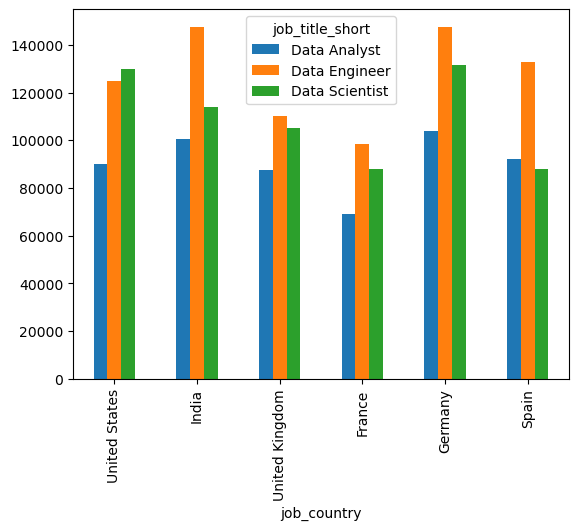

In [19]:
# Plot
top_countries = df['job_country'].value_counts().head(6).index

df_job_country_salary = df.pivot_table(
    values='salary_year_avg',        # The data to aggregate
    index='job_country',             # Rows (index of pivot table)
    columns='job_title_short',       # Columns (pivot table headers)
    aggfunc='median'                 # Aggregation function
)

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary.plot(kind='bar')

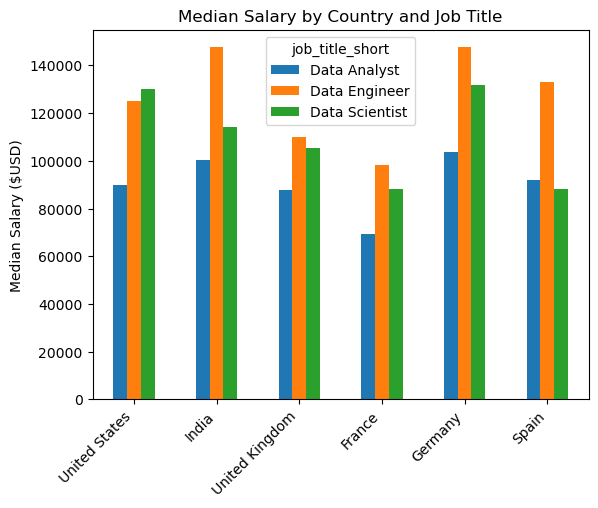

In [21]:
# Clean Plot
top_countries = df['job_country'].value_counts().head(6).index

df_job_country_salary = df.pivot_table(
    values='salary_year_avg',        # The data to aggregate
    index='job_country',             # Rows (index of pivot table)
    columns='job_title_short',       # Columns (pivot table headers)
    aggfunc='median'                 # Aggregation function
)

df_job_country_salary = df_job_country_salary.loc[top_countries]

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary ($USD)')
plt.xlabel('')
plt.title('Median Salary by Country and Job Title')  
plt.xticks(rotation=45, ha='right')
plt.show()

---

## Course Practice Problems

Create a pivot table to count the number of job postings for each job_title_short and job_country. Display the first 10 rows of the resulting pivot table. (2.4.1)

    Use the pivot_table() function using the parameters index and aggfunc.

In [27]:
df.pivot_table(index=['job_title_short', 'job_country'], aggfunc='size').head(10)

job_title_short   job_country
Business Analyst  Afghanistan      4
                  Albania         11
                  Algeria         21
                  Angola           1
                  Argentina      453
                  Armenia         29
                  Australia      928
                  Austria        738
                  Azerbaijan      16
                  Bahamas          5
dtype: int64

Create a pivot table to find the maximum, minimum, and average salary_year_avg for each company_name. Display the first 5 rows of the resulting pivot table. (2.4.2)

    Use the pivot_table() function with using the parameters values, index, and aggfunc.

In [28]:
df.pivot_table(values='salary_year_avg', index='company_name', aggfunc=['max','min','median']).head(5)

,max,min,median
,salary_year_avg,salary_year_avg,salary_year_avg
company_name,,,
#twiceasnice Recruiting,120000.000000,61000.000000,65000.000000
/dev/color,125000.000000,125000.000000,125000.000000
0nward Select,92500.000000,92500.000000,92500.000000
1 Point System,137290.484375,137290.484375,137290.484375
1 Point System LLC.,170000.000000,170000.000000,170000.000000


Create a pivot table to calculate the median of salary_year_avg for each company_name and job_country:

- Filter the pivot table to only include 'Data Scientist' roles.
- Then filter the pivot table to only include company_name with a median salary_year_avg greater than 200,000.
- Display the first 10 rows of the resulting pivot table.

(2.4.3)

    Filter the DataFrame to only include Data Scientist roles. Use the pivot_table() function using the parameters values, index, and aggfunc. Then filter the pivot table using a condition.

In [29]:
df.pivot_table(values='salary_year_avg', index=['company_name','job_country'], aggfunc='median').head(10)


,,salary_year_avg
company_name,job_country,
#twiceasnice Recruiting,United States,65000.000000
/dev/color,United States,125000.000000
0nward Select,United States,92500.000000
1 Point System,United States,137290.484375
1 Point System LLC.,United States,170000.000000
"1-800-FLOWERS.COM, INC.",United States,190000.000000
100Insure,United States,97500.000000
10x Genomics,United States,155000.000000
16 Points Holdings LLC,Puerto Rico,50000.000000


In [33]:
df[(df['job_title_short']== 'Data Scientist') & (df['salary_year_avg']>200000)]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr..."
2346,Data Scientist,"Staff Data Scientist, New Initiatives - Remote","Boston, MA",via WAVY Jobs,Full-time,False,"New York, United States",2023-08-05 13:18:49,False,False,United States,year,206500.0,NaN,Dropbox,"['sql', 'python']","{'programming': ['sql', 'python']}"
3593,Data Scientist,"Data Scientist - Tiktok Ads, Growth Marketing","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-09 13:02:16,False,True,United States,year,224500.0,NaN,ByteDance,None,None
4332,Data Scientist,Staff Data Scientist - Advertising,"Mt Pleasant Township, PA",via Ladders,Full-time,False,"New York, United States",2023-09-09 13:01:49,False,True,United States,year,220832.0,NaN,"Demandbase, Inc","['sql', 'no-sql', 'python', 'bigquery', 'aws',...","{'analyst_tools': ['excel'], 'cloud': ['bigque..."
5628,Data Scientist,"Data Scientist Lead, Global Monetization Strat...","San Jose, CA",via LinkedIn,Full-time,False,"California, United States",2023-11-29 13:04:38,False,True,United States,year,361000.0,NaN,TikTok,"['r', 'python', 'sql']","{'programming': ['r', 'python', 'sql']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779368,Data Scientist,"Data Science Director, Instagram - Product Fou...","Menlo Park, CA",via JobServe,Full-time,False,"California, United States",2023-06-28 05:04:17,False,False,United States,year,243000.0,NaN,Facebook,None,None
781090,Data Scientist,"Data Scientist, Responsibility & Privacy","Menlo Park, CA",via LinkedIn,Full-time,False,"California, United States",2023-11-15 06:01:57,False,False,United States,year,233000.0,NaN,Meta,"['python', 'sql']","{'programming': ['python', 'sql']}"
785290,Data Scientist,"Data Scientist, Tiktok Ads-Vertical Solutions","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-11 06:20:31,False,True,United States,year,224500.0,NaN,TikTok,None,None
785324,Data Scientist,Data Science Manager,"Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-11 06:20:33,False,True,United States,year,234500.0,NaN,TikTok,"['python', 'sql', 'r', 'neo4j', 'pandas', 'spa...","{'analyst_tools': ['tableau'], 'databases': ['..."


In [34]:
df[(df['job_title_short'] == 'Data Scientist') & (df['salary_year_avg'] > 200000)].pivot_table(values='salary_year_avg', index=['company_name','job_country'], aggfunc='median').head(10)

salary_year_avg
company_name      job_country                   
84.51             United States         225000.0
84.51°            United States         221875.0
ACT               Sudan                 225000.0
                  United States         225000.0
ANSER Corporation United States         225000.0
AT&T              Sudan                 212000.0
                  United States         214379.5
Abbott            United States         204000.0
Airbnb            United States         213750.0
Airtable          Sudan                 215500.0

In [35]:
#Correct & Course Solution
# Filter for only Data Scientist jobs
df_DS = df[df['job_title_short'] == 'Data Scientist'].copy()

# Create pivot table
pivot_table = df_DS.pivot_table(values='salary_year_avg', index=['company_name', 'job_country'], aggfunc='median')
filtered_pivot_table = pivot_table[pivot_table['salary_year_avg'] > 200000]
filtered_pivot_table.head(10)

salary_year_avg
company_name        job_country                   
ACT                 Sudan                 225000.0
                    United States         225000.0
Abbott              United States         204000.0
Airbnb              United States         212500.0
Airtable            Sudan                 215500.0
                    United States         233500.0
Algo Capital Group  Sudan                 325000.0
                    United States         350000.0
Amadeus Search      United States         232500.0
Analog Devices, Inc United States         375000.0

In [38]:
df_ds_jobs = df[df['job_title_short'] == 'Data Scientist'].copy()
pt = df_ds_jobs.pivot_table(values='salary_year_avg', index=['company_name', 'job_country'], aggfunc='median')
salary_filtered_pt = pt[pt['salary_year_avg'] > 200000]
salary_filtered_pt.head(10)

salary_year_avg
company_name        job_country                   
ACT                 Sudan                 225000.0
                    United States         225000.0
Abbott              United States         204000.0
Airbnb              United States         212500.0
Airtable            Sudan                 215500.0
                    United States         233500.0
Algo Capital Group  Sudan                 325000.0
                    United States         350000.0
Amadeus Search      United States         232500.0
Analog Devices, Inc United States         375000.0